In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv(r'/content/drive/MyDrive/DA_Project/data.csv')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Scheme Code,Scheme Name,Net Asset Value,Date
0,0,120704,Aditya Birla Sun Life MIP - Direct Plan - Growth,37.3799,2015-01-01
1,1,119640,Aditya Birla Sun Life MIP - Direct Plan - Mont...,13.1973,2015-01-01
2,2,100970,Aditya Birla Sun Life MIP - Regular Plan - Growth,37.0318,2015-01-01
3,3,100971,Aditya Birla Sun Life MIP - Regular Plan - Mon...,12.1826,2015-01-01
4,4,101713,Aditya Birla Sun Life MIP II - Saving 5 Plan -...,26.0410,2015-01-01
...,...,...,...,...,...
17482320,17482320,105882,Nippon India Interval Fund-Quarterly Interval ...,17.933,2021-11-18
17482321,17482321,118584,NIPPON INDIA QUARTERLY INTERVAL FUND - SERIES ...,10.055,2021-11-18
17482322,17482322,118583,Nippon India Quarterly Interval Fund - Series ...,17.0302,2021-11-18
17482323,17482323,105885,NIPPON INDIA QUARTERLY INTERVAL FUND - SERIES ...,10.0507,2021-11-18


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(['Scheme Code', 'Date'], axis = 0, ascending = True, inplace = True, na_position = 'first')
df

,Unnamed: 0,Scheme Code,Scheme Name,Net Asset Value,Date
1515,1515,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,278.23,2015-01-01
12281,12281,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,281.05,2015-01-02
24532,24532,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,281.68,2015-01-05
35363,35363,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,273.65,2015-01-06
46198,46198,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,273.56,2015-01-07
...,...,...,...,...,...
17449869,17449869,149313,Unclaimed IDCW - Beyond 3 years (Invested in D...,10.0,2021-11-14
17452310,17452310,149313,Unclaimed IDCW - Beyond 3 years (Invested in D...,10.0,2021-11-15
17460203,17460203,149313,Unclaimed IDCW - Beyond 3 years (Invested in D...,10.0,2021-11-16
17468100,17468100,149313,Unclaimed IDCW - Beyond 3 years (Invested in D...,10.0,2021-11-17


In [5]:
agg_df = df.groupby(['Scheme Code'])['Date'].agg(min_date = 'min', max_date = 'max', no_of_days = 'size').reset_index()
agg_df = pd.merge(df,agg_df, on = 'Scheme Code', how = 'left')
display(agg_df)

,Unnamed: 0,Scheme Code,Scheme Name,Net Asset Value,Date,min_date,max_date,no_of_days
0,1515,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,278.23,2015-01-01,2015-01-01,2021-11-18,1695
1,12281,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,281.05,2015-01-02,2015-01-01,2021-11-18,1695
2,24532,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,281.68,2015-01-05,2015-01-01,2021-11-18,1695
3,35363,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,273.65,2015-01-06,2015-01-01,2021-11-18,1695
4,46198,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,273.56,2015-01-07,2015-01-01,2021-11-18,1695
...,...,...,...,...,...,...,...,...
17482320,17449869,149313,Unclaimed IDCW - Beyond 3 years (Invested in D...,10.0,2021-11-14,2021-11-01,2021-11-18,14
17482321,17452310,149313,Unclaimed IDCW - Beyond 3 years (Invested in D...,10.0,2021-11-15,2021-11-01,2021-11-18,14
17482322,17460203,149313,Unclaimed IDCW - Beyond 3 years (Invested in D...,10.0,2021-11-16,2021-11-01,2021-11-18,14
17482323,17468100,149313,Unclaimed IDCW - Beyond 3 years (Invested in D...,10.0,2021-11-17,2021-11-01,2021-11-18,14


In [6]:
from datetime import datetime
agg_df['max_date'] = pd.to_datetime(agg_df['max_date'], format = '%Y-%m-%d').dt.date
filter_date = datetime.strptime('18-11-2015', '%d-%m-%Y').date()
mask = ((agg_df['no_of_days'] >= 365) & (agg_df['max_date'] >= filter_date))
df_final = agg_df.loc[mask]
df_final

,Unnamed: 0,Scheme Code,Scheme Name,Net Asset Value,Date,min_date,max_date,no_of_days
0,1515,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,278.23,2015-01-01,2015-01-01,2021-11-18,1695
1,12281,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,281.05,2015-01-02,2015-01-01,2021-11-18,1695
2,24532,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,281.68,2015-01-05,2015-01-01,2021-11-18,1695
3,35363,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,273.65,2015-01-06,2015-01-01,2021-11-18,1695
4,46198,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,273.56,2015-01-07,2015-01-01,2021-11-18,1695
...,...,...,...,...,...,...,...,...
17385914,17450287,148415,JM Liquid Fund - Withheld Brokerage I.E.F. (Di...,41.4437,2021-11-14,2020-06-29,2021-11-18,426
17385915,17452728,148415,JM Liquid Fund - Withheld Brokerage I.E.F. (Di...,41.4437,2021-11-15,2020-06-29,2021-11-18,426
17385916,17460621,148415,JM Liquid Fund - Withheld Brokerage I.E.F. (Di...,41.4437,2021-11-16,2020-06-29,2021-11-18,426
17385917,17468518,148415,JM Liquid Fund - Withheld Brokerage I.E.F. (Di...,41.4437,2021-11-17,2020-06-29,2021-11-18,426


In [7]:
df_final = df_final.drop(1).reset_index()

In [8]:
df_final = df_final[df_final['Net Asset Value'].str.contains("N.A.") == False]

In [9]:
df_final["Net Asset Value"] = pd.to_numeric(df_final["Net Asset Value"], downcast = "float")

In [10]:
df_final = df_final[df_final["Net Asset Value"] != 0]

In [11]:
df_final['Return'] = df_final.groupby(['Scheme Code'])['Net Asset Value'].pct_change(periods = 1)

In [12]:
df_final.head()

,index,Unnamed: 0,Scheme Code,Scheme Name,Net Asset Value,Date,min_date,max_date,no_of_days,Return
0,0,1515,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,278.230011,2015-01-01,2015-01-01,2021-11-18,1695,NaN
1,2,24532,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,281.679993,2015-01-05,2015-01-01,2021-11-18,1695,0.012400
2,3,35363,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,273.649994,2015-01-06,2015-01-01,2021-11-18,1695,-0.028508
3,4,46198,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,273.559998,2015-01-07,2015-01-01,2021-11-18,1695,-0.000329
4,5,57041,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,278.399994,2015-01-08,2015-01-01,2021-11-18,1695,0.017693


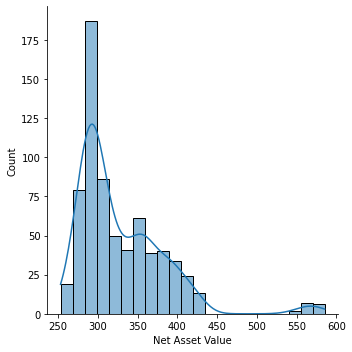

In [13]:
import seaborn as sns
sample_1 = df_final[df_final['Scheme Code'] == 100033]
sns.displot(sample_1['Net Asset Value'], kde=True)

In [14]:
result = df_final.groupby(['Scheme Code', 'Scheme Name'])['Return'].agg(Mean_Return = 'mean', Std_Return = 'std', Min_Return = 'min', Max_Return = 'max', Median_Return = 'median').reset_index()
display(result)

,Scheme Code,Scheme Name,Mean_Return,Std_Return,Min_Return,Max_Return,Median_Return
0,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,0.001234,0.018434,-0.137610,0.379333,0.001351
1,100034,Aditya Birla Sun Life Equity Advantage Fund -R...,0.019004,0.052684,-0.003726,0.208057,0.005784
2,100034,Aditya Birla Sun Life Equity Advantage Fund -R...,-0.000031,0.015709,-0.208099,0.030641,0.001303
3,100037,Aditya Birla Sun Life Income Fund - Quarterly ...,-0.000062,0.004188,-0.052258,0.015929,0.000280
4,100037,Aditya Birla Sun Life Income Fund - Regular - ...,0.005675,0.020031,-0.000338,0.075255,0.000372
...,...,...,...,...,...,...,...
21864,148389,SBI Fixed Maturity Plan (FMP) - Series 34 (368...,0.000211,0.000957,-0.001738,0.001978,0.000169
21865,148390,SBI Fixed Maturity Plan (FMP) - Series 34 (368...,0.000211,0.000957,-0.001738,0.001978,0.000169
21866,148413,JM Liquid Fund - Unclaimed Brokerage I.E.F. (D...,0.000000,0.000000,0.000000,0.000000,0.000000
21867,148414,JM Liquid Fund - Unclaimed Application Refund ...,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
result.describe()

,Scheme Code,Mean_Return,Std_Return,Min_Return,Max_Return,Median_Return
count,21869.000000,21853.000000,21839.000000,21853.000000,21853.000000,21853.000000
mean,130168.286433,0.004126,0.028014,-0.024010,0.330604,0.000771
std,13440.789596,0.020660,0.284518,0.055210,5.032981,0.002520
min,100033.000000,-0.063873,0.000000,-0.985464,0.000000,-0.001390
25%,120066.000000,0.000179,0.000637,-0.019697,0.002252,0.000207
50%,132973.000000,0.000389,0.004116,-0.003523,0.014010,0.000283
75%,142165.000000,0.001256,0.012053,-0.000784,0.100016,0.000508
max,148415.000000,1.165990,10.749070,0.171654,106.973320,0.171654


In [16]:
# Hypothesis Testing: Conservative Investors (Target return is 0.01% per day)
result['Z-Score'] = (0.01 - result['Mean_Return'])/result['Std_Return']
result.sort_values(['Z-Score'], inplace = True)
result[0:5]

,Scheme Code,Scheme Name,Mean_Return,Std_Return,Min_Return,Max_Return,Median_Return,Z-Score
16654,142437,Invesco India Fixed Maturity Plan - Series 30 ...,0.090135,0.127101,0.000261,0.180009,0.090135,-0.630482
5021,119628,Sundaram Banking and PSU Debt Fund Direct Plan...,0.078321,0.111041,-0.000196,0.156839,0.078321,-0.615281
16135,141880,ICICI Prudential Value Fund - Series 18 - Dire...,0.122008,0.209624,-0.004717,0.363971,0.006770,-0.534327
16137,141881,ICICI Prudential Value Fund - Series 18 - IDCW...,0.117531,0.202417,-0.004865,0.351174,0.006285,-0.531237
17244,143180,Kotak FMP Series 225-Direct Plan-Payout of Inc...,0.055104,0.095138,0.000087,0.164960,0.000265,-0.474091


In [17]:
# Hypothesis Testing: Moderate Investors (Target return is 0.04% per day)
result['Z-Score'] = (0.04 - result['Mean_Return'])/result['Std_Return']
result.sort_values(['Z-Score'], inplace = True, ascending = True)
result[0:5]

,Scheme Code,Scheme Name,Mean_Return,Std_Return,Min_Return,Max_Return,Median_Return,Z-Score
16654,142437,Invesco India Fixed Maturity Plan - Series 30 ...,0.090135,0.127101,0.000261,0.180009,0.090135,-0.394450
16135,141880,ICICI Prudential Value Fund - Series 18 - Dire...,0.122008,0.209624,-0.004717,0.363971,0.006770,-0.391214
16137,141881,ICICI Prudential Value Fund - Series 18 - IDCW...,0.117531,0.202417,-0.004865,0.351174,0.006285,-0.383028
17322,143245,Kotak India Growth Fund Series 5-Direct PLan-a...,0.143219,0.286987,-0.001017,0.573699,0.000097,-0.359664
17324,143246,Kotak India Growth Fund Series 5-Regular Plan-...,0.141598,0.283763,-0.001024,0.567241,0.000087,-0.358038


In [18]:
# Hypothesis Testing: Aggresive Investors (Target return is 0.1% per day)
result['Z-Score'] = (0.1 - result['Mean_Return'])/result['Std_Return']
result.sort_values(['Z-Score'], inplace = True)
result[0:5]

,Scheme Code,Scheme Name,Mean_Return,Std_Return,Min_Return,Max_Return,Median_Return,Z-Score
17322,143245,Kotak India Growth Fund Series 5-Direct PLan-a...,0.143219,0.286987,-0.001017,0.573699,0.000097,-0.150595
17324,143246,Kotak India Growth Fund Series 5-Regular Plan-...,0.141598,0.283763,-0.001024,0.567241,0.000087,-0.146593
16135,141880,ICICI Prudential Value Fund - Series 18 - Dire...,0.122008,0.209624,-0.004717,0.363971,0.006770,-0.104988
4167,118816,Indiabulls Gilt Fund - Direct Plan - Weekly Di...,1.165990,10.749070,-0.012745,99.101616,0.000248,-0.099170
16137,141881,ICICI Prudential Value Fund - Series 18 - IDCW...,0.117531,0.202417,-0.004865,0.351174,0.006285,-0.086610


In [53]:
scheme_code = int(input("Enter the scheme code: "))

Enter the scheme code: 143245


In [70]:
scheme_code

143245

In [82]:
scheme_code_df = df[df["Scheme Code"] == scheme_code]
scheme_code_df = scheme_code_df[["Date", "Net Asset Value"]]
# scheme_code_df = scheme_code_df.set_index("Date")

In [83]:
scheme_code_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 9032296 to 16413343
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             735 non-null    datetime64[ns]
 1   Net Asset Value  735 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 17.2+ KB


In [84]:
scheme_code_df['Returns'] = scheme_code_df['Net Asset Value'].astype(float).pct_change()
scheme_code_df = scheme_code_df.iloc[1:, :]
display(scheme_code_df)

,Date,Net Asset Value,Returns
9041765,2018-05-23,9.887,-0.003427
9051235,2018-05-24,9.864,-0.002326
9060660,2018-05-25,9.922,0.005880
9071260,2018-05-28,9.971,0.004939
9080678,2018-05-29,9.969,-0.000201
...,...,...,...
16375725,2021-05-11,14.768,-0.000406
16384492,2021-05-12,14.755,-0.000880
16394197,2021-05-14,14.74,-0.001017
16404594,2021-05-17,14.742,0.000136


In [85]:
from sklearn.preprocessing import MinMaxScaler
scheme_code_df = scheme_code_df[["Date", "Returns"]]
scheme_code_df = scheme_code_df.set_index("Date")
scaler = MinMaxScaler()
scheme_code_df["Scaled Returns"] = scaler.fit_transform(scheme_code_df.to_numpy()) * 10
scheme_code_df

,Returns,Scaled Returns
Date,,
2018-05-23,-0.003427,6.478924
2018-05-24,-0.002326,6.537299
2018-05-25,0.005880,6.972479
2018-05-28,0.004939,6.922553
2018-05-29,-0.000201,6.650026
...,...,...
2021-05-11,-0.000406,6.639126
2021-05-12,-0.000880,6.613981
2021-05-14,-0.001017,6.606752


In [25]:
# Don't run this cell
# import matplotlib.pyplot as plt
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# plot_acf(df, lags = 50)
# plt.plot()

In [86]:
from statsmodels.tsa.stattools import adfuller

def print_adf_results(adf_result):
    print('ADF Statistic: %f' % adf_result[0])
    print('p-value: %f' % adf_result[1])
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('\t%s: %.3f' % (key, value))

print_adf_results(adfuller(scheme_code_df["Scaled Returns"]))

ADF Statistic: -7.555368
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569


In [90]:
train = scheme_code_df["Scaled Returns"][0 : -31]
test = scheme_code_df["Scaled Returns"][-31 : -1]

In [97]:
# !pip install pmdarima
import pmdarima as pm
model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf', 
                      max_p=3, max_q=3,
                      m = 1,     
                      d=None,      
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1465.919, Time=1.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4677.451, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3864.024, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=1.64 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=1.67 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3339.638, Time=0.62 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1449.292, Time=1.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1454.581, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1454.364, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1446.517, Time=1.27 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1450.138, Time=0.18 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1448.595, Time=1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


RMSE:  0.568980261558112
MAPE:  0.059623960366899216


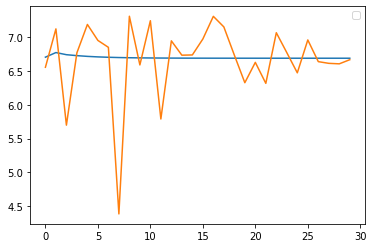

In [98]:
import sklearn.metrics  
import math
predicted = model.predict(n_periods = 30)
rmse = math.sqrt((sklearn.metrics.mean_squared_error(test, predicted)))
print("RMSE: ", rmse)
mape = sklearn.metrics.mean_absolute_percentage_error(test, predicted)
mape
print("MAPE: ", mape)
x = np.arange(30)
plt.plot(x, predicted)
plt.plot(x, test)
plt.legend()
plt.show()

In [99]:
from keras.layers import LSTM, Dense
from keras import Sequential

In [ ]:
new_train = []
new_test = []
count = 0
for in range(len(df["Scaled Returns"])):
  

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape = (30, 1), return_seqence = True))
model.add(LSTM(128))
model.add(Dense(1, activation = 'relu'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit()

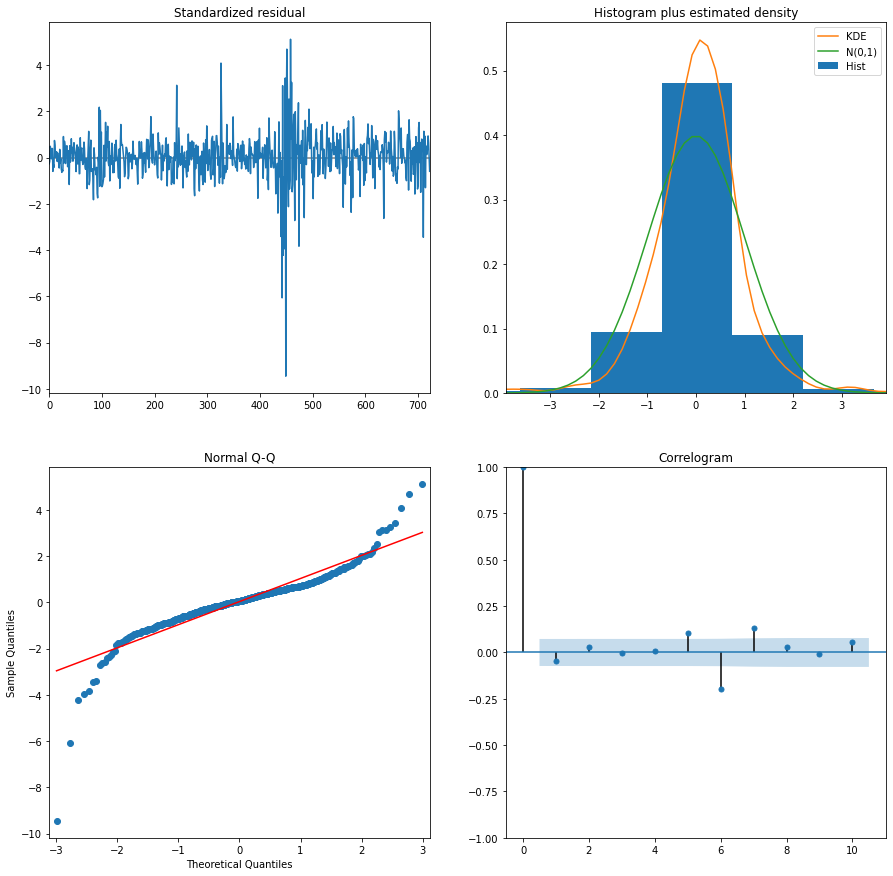

In [30]:
import matplotlib.pyplot as plt
model.plot_diagnostics(figsize=(15,15))
plt.show()

In [31]:
import numpy as np
# scheme_code_df = scheme_code_df.set_index("Date")
predictions = pd.DataFrame(model.predict(n_periods = 30))
predictions.columns = ['Predictions']
predictions

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


,Predictions
723,0.000547
724,0.000465
725,0.000395
726,0.000336
727,0.000286
728,0.000243
729,0.000207
730,0.000176
731,0.000149
732,0.000127
